## 1. Import Libraries

First, we import all necessary libraries for the analysis.

In [25]:
import pandas_ti
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
from typing import Literal

## 2. Load Market Data

We download historical price data using `yfinance`.

In [37]:
ticker = 'AAPL'
df = yf.Ticker(ticker).history(period='2y', interval='1d')[['Open', 'High', 'Low', 'Close', 'Volume']]
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-11-04 00:00:00-05:00,219.966273,221.757922,218.692204,220.981537,44944500
2024-11-05 00:00:00-05:00,220.772536,222.912570,220.115590,222.414886,28111300
2024-11-06 00:00:00-05:00,221.578772,225.022750,220.165352,221.688263,54561100
2024-11-07 00:00:00-05:00,223.589420,226.824365,223.529700,226.426208,42137700
2024-11-08 00:00:00-05:00,226.366414,227.851149,225.609108,226.157166,38328800
...,...,...,...,...,...
2025-10-28 00:00:00-04:00,268.989990,269.890015,268.149994,269.000000,41534800
2025-10-29 00:00:00-04:00,269.279999,271.410004,267.109985,269.700012,51086700
2025-10-30 00:00:00-04:00,271.989990,274.140015,268.480011,271.399994,69886500


## 3. Using the ZigZag Indicator

ZigZag is implemented as a **stateful class** (`ZigZagClass`) that processes real-time data. This allows:
- Updating the indicator candle by candle
- Maintaining confirmed pivots and candidates
- Accessing internal state at any time

### Main parameters:
- **`pct`**: Minimum percentage change required to confirm a pivot (e.g., 0.05 = 5%)
- **`debug`**: If `True`, stores detailed internal state information

### 3.1 Import the ZigZag class

In [27]:
from pandas_ti.indicators_dataframe.ZigZag import ZigZagClass

### 3.2 Create instance and process data

We create an instance with `pct=0.05` (5% minimum change) and `debug=True` to see internal details. Then we iterate over each DataFrame row to update the indicator.

In [39]:
# Create ZigZag instance with 5% threshold
zz = ZigZagClass(pct=0.1, debug=True)

# Process each candle in the DataFrame
for idx, row in df.iterrows():
    high, low = row['High'], row['Low']
    zz.update(high=high, low=low, idx=idx)

# Add pivots column to the original DataFrame
df['zigzag'] = zz.pivots()
df['zigzag']

Date
2024-11-04 00:00:00-05:00    218.692204
2024-11-05 00:00:00-05:00           NaN
2024-11-06 00:00:00-05:00           NaN
2024-11-07 00:00:00-05:00           NaN
2024-11-08 00:00:00-05:00           NaN
                                ...    
2025-10-28 00:00:00-04:00           NaN
2025-10-29 00:00:00-04:00           NaN
2025-10-30 00:00:00-04:00           NaN
2025-10-31 00:00:00-04:00    277.320007
2025-11-03 00:00:00-05:00           NaN
Name: zigzag, Length: 250, dtype: float64

## 4. ZigZag Methods

The `ZigZagClass` provides several methods to access the processed data:

### 4.1 Method `.df()` - Complete DataFrame

Returns a DataFrame with all historical processed data. Only **confirmed** pivots have non-NaN values in the `ZigZag` and `type` columns.

In [29]:
# View all processed data
zz.df()

,High,Low,ZigZag,type
index,,,,
2024-11-04 00:00:00-05:00,181.94,178.00,178.0,Low
2024-11-05 00:00:00-05:00,184.24,181.10,NaN,NaN
2024-11-06 00:00:00-05:00,193.10,188.00,NaN,NaN
2024-11-07 00:00:00-05:00,193.60,188.11,NaN,NaN
2024-11-08 00:00:00-05:00,196.60,192.13,NaN,NaN
...,...,...,...,...
2025-10-28 00:00:00-04:00,223.61,219.68,NaN,NaN
2025-10-29 00:00:00-04:00,219.81,216.00,NaN,NaN
2025-10-30 00:00:00-04:00,221.27,216.61,NaN,NaN


In [30]:
# Filter only confirmed pivots (no NaN)
df_zz = zz.df()
zigzag = df_zz.dropna()
print('Confirmed ZigZag Pivots:')
zigzag.round(2)

Confirmed ZigZag Pivots:


Confirmed ZigZag Pivots:


,High,Low,ZigZag,type
index,,,,
2024-11-04 00:00:00-05:00,181.94,178.00,178.00,Low
2024-11-13 00:00:00-05:00,204.26,198.65,204.26,High
2024-11-22 00:00:00-05:00,197.01,187.60,187.60,Low
2024-12-09 00:00:00-05:00,205.12,194.07,205.12,High
2024-12-10 00:00:00-05:00,198.22,193.87,193.87,Low
2024-12-17 00:00:00-05:00,207.24,199.00,207.24,High
2025-01-13 00:00:00-05:00,170.53,166.21,166.21,Low
2025-01-28 00:00:00-05:00,197.74,186.57,197.74,High
2025-02-03 00:00:00-05:00,184.24,180.12,180.12,Low


### 4.2 Candidate Pivot (Not Confirmed)

ZigZag maintains a **candidate pivot** which is the most recent potential reversal point. This pivot is only confirmed when price moves sufficiently in the opposite direction.

You can access the candidate through:
- `zz.candidate_idx`: Temporal index of the candidate pivot
- `zz.candidate_price`: Price of the candidate pivot

In [31]:
print('Candidate ZigZag Pivot (not yet confirmed):')
print(f'Index: {zz.candidate_idx}')
print(f'Price: {zz.candidate_price.round(2)}')

Candidate ZigZag Pivot (not yet confirmed):
Index: 2025-10-28 00:00:00-04:00
Price: 223.61


### 4.3 Method `.pivots()`

The `.pivots()` method returns a Series with **all pivots, including the current candidate**. This is useful for real-time visualization.

In [32]:
print('All ZigZag Pivots (confirmed + candidate):')
zz.pivots().dropna().round(2)

All ZigZag Pivots (confirmed + candidate):


All ZigZag Pivots (confirmed + candidate):


2024-11-04 00:00:00-05:00    178.00
2024-11-13 00:00:00-05:00    204.26
2024-11-22 00:00:00-05:00    187.60
2024-12-09 00:00:00-05:00    205.12
2024-12-10 00:00:00-05:00    193.87
2024-12-17 00:00:00-05:00    207.24
2025-01-13 00:00:00-05:00    166.21
2025-01-28 00:00:00-05:00    197.74
2025-02-03 00:00:00-05:00    180.12
2025-02-13 00:00:00-05:00    202.41
2025-02-14 00:00:00-05:00    188.75
2025-02-19 00:00:00-05:00    208.39
2025-03-10 00:00:00-04:00    172.62
2025-03-12 00:00:00-04:00    184.16
2025-03-13 00:00:00-04:00    174.31
2025-03-19 00:00:00-04:00    189.67
2025-03-21 00:00:00-04:00    179.72
2025-03-26 00:00:00-04:00    191.00
2025-03-31 00:00:00-04:00    165.88
2025-04-02 00:00:00-04:00    174.74
2025-04-07 00:00:00-04:00    144.15
2025-04-09 00:00:00-04:00    174.11
2025-04-11 00:00:00-04:00    161.45
2025-04-15 00:00:00-04:00    174.94
2025-04-21 00:00:00-04:00    157.60
2025-05-13 00:00:00-04:00    195.42
2025-05-21 00:00:00-04:00    178.64
2025-06-26 00:00:00-04:00   

## 5. Visualization with mplfinance

Now we visualize the candlestick chart along with the detected ZigZag pivots. Orange dots represent confirmed pivots, while the red dot shows the current candidate pivot.

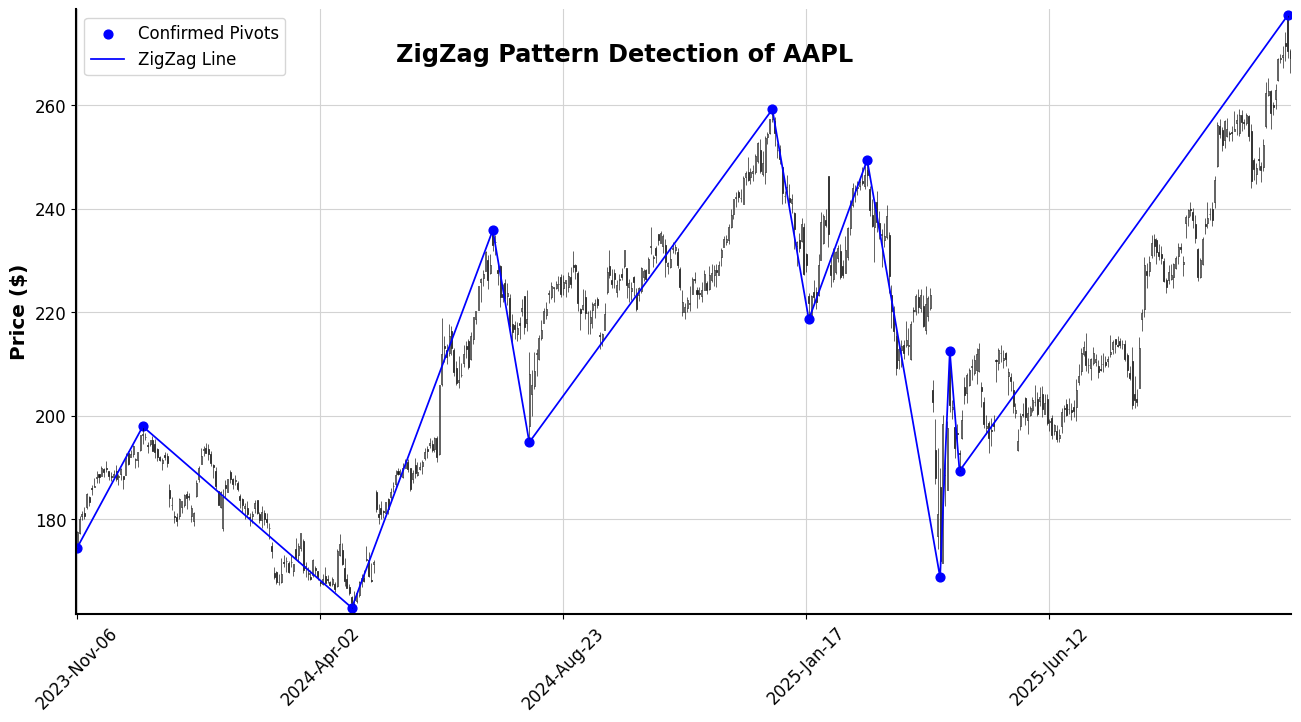

In [108]:
# Configure custom chart style
my_style = mpf.make_mpf_style(
    base_mpf_style='classic',
    facecolor='white',
    gridcolor='lightgray',
    gridstyle='-',
    y_on_right=False,
    rc={
        'axes.edgecolor': 'black',
        'axes.spines.top': False,
        'axes.spines.right': False
    }
)

# Prepare additional plots
apds = [
    mpf.make_addplot(
        df['zigzag'],
        type='scatter',
        color='blue',
        marker='o',
        markersize=40,
        label='Confirmed Pivots'
    ),
    mpf.make_addplot(
        df['zigzag_filled'],
        type='line',
        color='blue',
        linestyle='-',
        label='ZigZag Line'
    )
]

# Create the chart
mpf.plot(
    df,
    type='candle',
    addplot=apds,
    style=my_style,
    title=f"ZigZag Pattern Detection of {ticker}",
    ylabel='Price ($)',
    figsize=(14, 7),
    volume=False,
    tight_layout=True
)

In [112]:
# Create another DataFrame for smoothed version
df3 = yf.Ticker(ticker).history(period='2y', interval='1d')[['Open', 'High', 'Low', 'Close', 'Volume']]
# Apply SMA smoothing
df3['High_SMA3'] = df3['High'].ti.SMA(n=3)
df3['Low_SMA3'] = df3['Low'].ti.SMA(n=3)
# Apply ZigZag with SMA smoothing
df3['zigzag'] = df3.ti.ZigZag(High=df3['High_SMA3'], Low=df3['Low_SMA3'], pct=0.1)


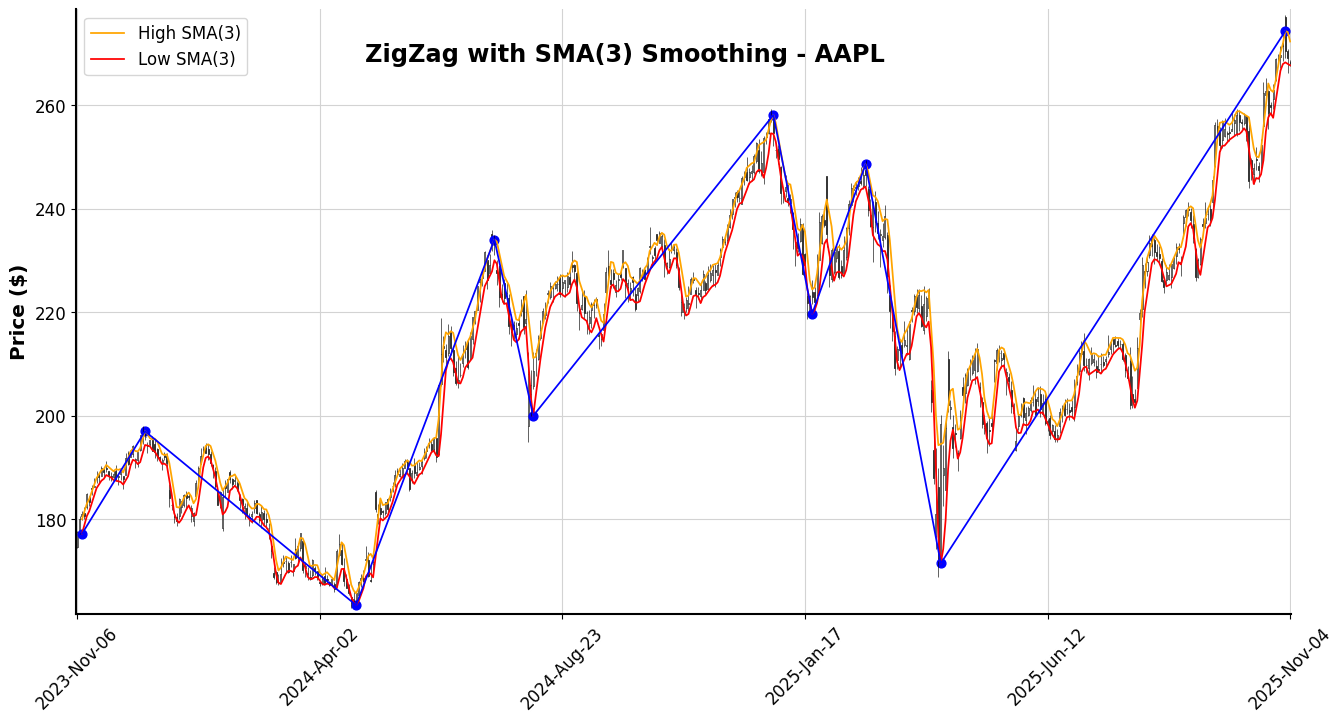

In [116]:
# Visualize smoothed ZigZag
df3['zigzag_filled'] = df3['zigzag'].interpolate(method='linear', limit_area='inside')

apds = [
    mpf.make_addplot(df3['High_SMA3'], type='line', color='orange', linestyle='-', label='High SMA(3)'),
    mpf.make_addplot(df3['Low_SMA3'], type='line', color='red', linestyle='-', label='Low SMA(3)'),
    mpf.make_addplot(df3['zigzag'], type='scatter', color='blue', marker='o', markersize=40),
    mpf.make_addplot(df3['zigzag_filled'], type='line', color='blue', linestyle='-')
]

mpf.plot(df3, type='candle', addplot=apds, style=my_style, 
         title=f"ZigZag with SMA(3) Smoothing - {ticker}", ylabel='Price ($)', 
         figsize=(14, 7), volume=False, tight_layout=True)